## Find the profiles with the closest personalities to You

### Libraries and helpers

In [1]:
!pip install matplotlib

import requests
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

Sorting function to find the profiles with the closest personalities. You can choose how many profiles you want to see by setting the variable *top* below. Its default value is 10.

In [2]:
def sortedCounter(counter, top=10):
    return dict(
        sorted(list(counter.items()),
               key=lambda x: x[1]["count"], reverse=True)[:top]
    )

### Visualizations


>Get some pastel colors:

In [3]:
cmap = get_cmap("Pastel1")
colors = cmap.colors

>Function to show a Bar Plot:

In [4]:
def showBarPlot(sortedCounter):
    fig = plt.figure(figsize=(25, 10))
    plt.bar(range(len(sortedCounter)), [
            i["count"] for i in list(sortedCounter.values())], color=colors)
    plt.xticks(range(len(sortedCounter)), list(
        sortedCounter.keys()), rotation=90)
    plt.ylabel("Points")
    plt.xlabel("Profiles")
    plt.show()


### Getting the Data and Comparing

In [5]:
os.chdir("../getting_data/data")
file = open(f"{os.path.abspath(os.curdir)}/data.json", encoding='utf-8')
data = json.load(file)

In [6]:
def findProfilesWithYourClosestPersonalityType(personalityType, data):
    profiles = {}
    for profile, personality in data.items():
        count = 0
        for key, category in personalityType.items():
            if key in personality["personality_type"]:
                if personality["personality_type"][key] == category:
                    count += 1
        profiles[profile] = {
            "count": count,
            "personality_type": personality["personality_type"],
        }
    return profiles

## Testing the data
I'm going to use my personality type to test the Data

In [7]:
myPersonality = {
    "1": "ENTP",
    "2": "7w8",
    "3": "ILE",
    "4": "Chaotic Neutral",
    "5": "sp/sx",
    "6": "738",
    "7": "Sanguine-Choleric",
    "8": "LEVF",
    "9": "SCOEI",
    "10" : "Left-brained Extrovert"
}


profiles = findProfilesWithYourClosestPersonalityType(myPersonality, data)

# top 15 profiles
sortedProfiles = sortedCounter(profiles, 15)
                              

We can see them visualized

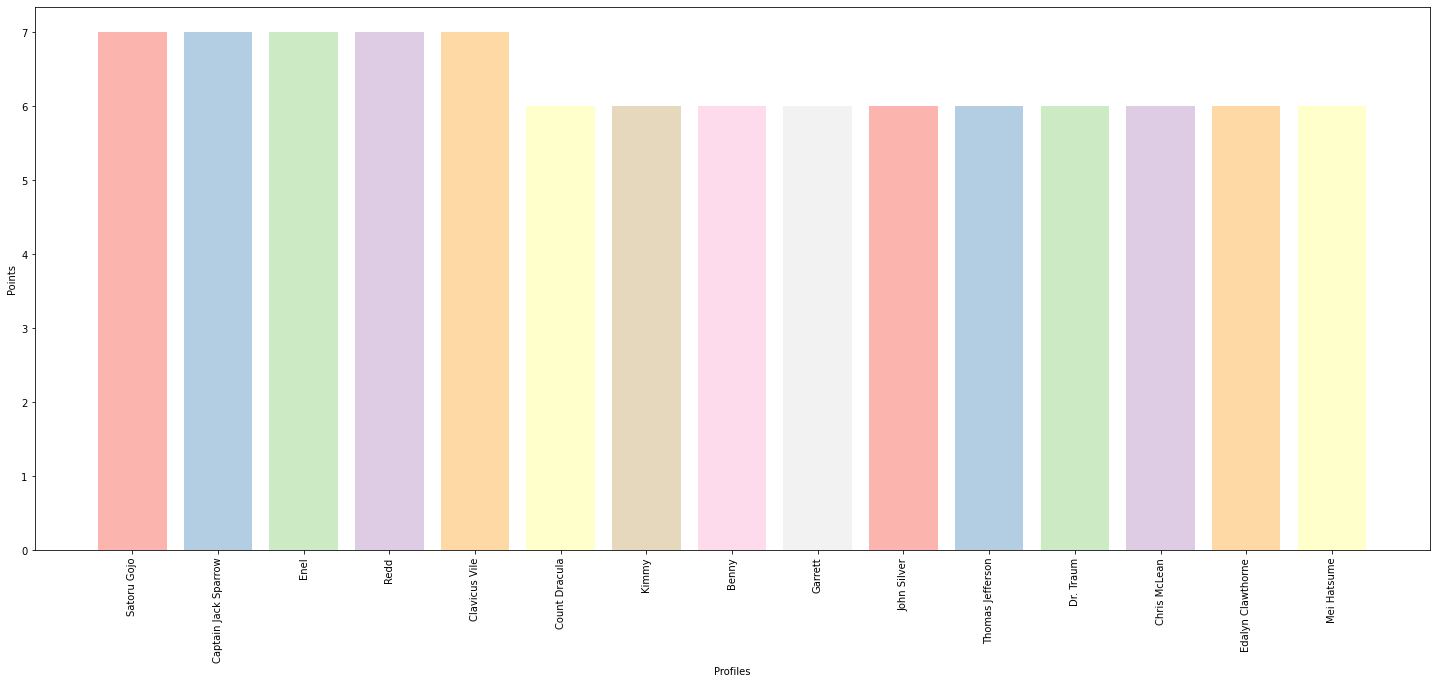

In [8]:
showBarPlot(sortedProfiles)